## **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

## **Importing files**

In [2]:
loans_inputs_test = pd.read_csv("loans_inputs_test.csv", index_col = "id")
loans_targets_test = pd.read_csv("loans_targets_test.csv", index_col = "id")
loans_inputs_train = pd.read_csv("loans_inputs_train.csv", index_col = "id")
loans_targets_train = pd.read_csv("loans_targets_train.csv", index_col = "id")

In [3]:
dummies_list = ['home_ownership:_other_rent',
 'home_ownership:_none_own',
 'home_ownership:_mortgage_any',
 'purpose:debt_consolidation',
 'purpose:_educational_small_business_renewable_energy_moving',
 'purpose:_medical_house_other',
 'purpose:_major_purchase_vacation_wedding_home_improvement',
 'purpose:_credit_card_car',
 'addr_state:ca',
 'addr_state:fl',
 'addr_state:ny',
 'addr_state:tx',
 'addr_state:_ia_ar_ms_al_ok_nv_la',
 'addr_state:_hi_nm_sd_md_pa_in_mo',
 'addr_state:_nc_nj_tn_mn_mi_va_ky',
 'addr_state:_ne_az_ak_oh_de_ma',
 'addr_state:_wi_ga_ut',
 'addr_state:_il_ct_ri_wy_ks_mt',
 'addr_state:_co_wa_nd_sc_nh',
 'addr_state:_or_dc_id_wv_vt_me',
 'term:36',
 'term:60',
 'verification_status:verified',
 'verification_status:not verified',
 'verification_status:source verified',
 'initial_list_status:f',
 'initial_list_status:w',
 'application_type:individual',
 'application_type:joint app',
 'hardship_flag:n',
 'hardship_flag:y',
 'grade:D',
 'grade:C',
 'grade:A',
 'grade:B',
 'grade:E',
 'grade:F',
 'grade:G',
 'emp_length:0',
 'emp_length:1',
 'emp_length:2-6',
 'emp_length:7',
 'emp_length:8-9',
 'emp_length:10',
 'delinq_2yrs:0',
 'delinq_2yrs:1',
 'delinq_2yrs:>=2',
 'inq_last_6mths:0',
 'inq_last_6mths:1',
 'inq_last_6mths:2',
 'inq_last_6mths:3',
 'inq_last_6mths:>=4',
 'pub_rec:0',
 'pub_rec:1',
 'pub_rec:>=2',
 'collections_12_mths_ex_med:0',
 'collections_12_mths_ex_med:1',
 'collections_12_mths_ex_med:>=2',
 'open_acc_6m:0',
 'open_acc_6m:1',
 'open_acc_6m:2',
 'open_acc_6m:3',
 'open_acc_6m:4',
 'open_acc_6m:>=5',
 'open_il_12m:0',
 'open_il_12m:1',
 'open_il_12m:2',
 'open_il_12m:3',
 'open_il_12m:4',
 'open_il_12m:>=5',
 'open_il_24m:0',
 'open_il_24m:1',
 'open_il_24m:2',
 'open_il_24m:3',
 'open_il_24m:4-6',
 'open_il_24m:7-11',
 'open_il_24m:12-16',
 'open_il_24m:>=17',
 'open_rv_12m:0',
 'open_rv_12m:1',
 'open_rv_12m:2',
 'open_rv_12m:3',
 'open_rv_12m:4',
 'open_rv_12m:5',
 'open_rv_12m:6-11',
 'open_rv_12m:>=12',
 'inq_fi:0',
 'inq_fi:1',
 'inq_fi:2',
 'inq_fi:3',
 'inq_fi:4',
 'inq_fi:5',
 'inq_fi:6',
 'inq_fi:7',
 'inq_fi:>=8',
 'inq_last_12m:0',
 'inq_last_12m:1',
 'inq_last_12m:2',
 'inq_last_12m:3',
 'inq_last_12m:4',
 'inq_last_12m:5',
 'inq_last_12m:6',
 'inq_last_12m:7',
 'inq_last_12m:8',
 'inq_last_12m:9',
 'inq_last_12m:10-14',
 'inq_last_12m:>=15',
 'chargeoff_within_12_mths:0',
 'chargeoff_within_12_mths:1',
 'chargeoff_within_12_mths:>=2',
 'mort_acc:0',
 'mort_acc:1',
 'mort_acc:2',
 'mort_acc:>=3',
 'num_tl_op_past_12m:0',
 'num_tl_op_past_12m:1',
 'num_tl_op_past_12m:2',
 'num_tl_op_past_12m:3',
 'num_tl_op_past_12m:4',
 'num_tl_op_past_12m:5',
 'num_tl_op_past_12m:6',
 'num_tl_op_past_12m:7',
 'num_tl_op_past_12m:8',
 'num_tl_op_past_12m:9-12',
 'num_tl_op_past_12m:13-16',
 'num_tl_op_past_12m:>=17',
 'pub_rec_bankruptcies:0',
 'pub_rec_bankruptcies:1',
 'pub_rec_bankruptcies:2',
 'pub_rec_bankruptcies:3-5',
 'pub_rec_bankruptcies:>=6',
 'int_rate:<6.9',
 'int_rate:6.9-7.3',
 'int_rate:8.5-9',
 'int_rate:9-12',
 'int_rate:12-15.6',
 'int_rate:15.6-19.2',
 'int_rate:19.2-24.0',
 'int_rate:>=24.0',
 'total_pymnt:<1300.0',
 'total_pymnt:1300.0-5400.0',
 'total_pymnt:5400.0-10800.0',
 'total_pymnt:10800-16200',
 'total_pymnt:16200-20150',
 'total_pymnt:20150-21500',
 'total_pymnt:21500-22850',
 'total_pymnt:22850-25500',
 'total_pymnt:25500-28200',
 'total_pymnt:28200-32250',
 'total_pymnt:32250-35000',
 'total_pymnt:35000-36500',
 'total_pymnt:36500-38000',
 'total_pymnt:39500-41000',
 'total_pymnt:42500-44000',
 'total_pymnt:>=44000',
 'mnths_since_earliest_cr_line:<130',
 'mnths_since_earliest_cr_line:130-185',
 'mnths_since_earliest_cr_line:185-350',
 'mnths_since_earliest_cr_line:350-555',
 'mnths_since_earliest_cr_line:555-660',
 'mnths_since_earliest_cr_line:660-760',
 'mnths_since_earliest_cr_line:>=760',
 'mnths_since_last_pymnt_d:<6',
 'mnths_since_last_pymnt_d:6-8',
 'mnths_since_last_pymnt_d:8-10',
 'mnths_since_last_pymnt_d:10-35',
 'mnths_since_last_pymnt_d:35-100',
 'mnths_since_last_pymnt_d:>=100',
 'mnths_since_issue_d:<6',
 'mnths_since_issue_d:6-10',
 'mnths_since_issue_d:10-13',
 'mnths_since_issue_d:13-16',
 'mnths_since_issue_d:16-20',
 'mnths_since_issue_d:20-22.5',
 'mnths_since_issue_d:22.5-29',
 'mnths_since_issue_d:29-39',
 'mnths_since_issue_d:39-52',
 'mnths_since_issue_d:52-84',
 'mnths_since_issue_d:84-120',
 'mnths_since_issue_d:>=120',
 'annual_inc:<7000',
 'annual_inc:7000-12000',
 'annual_inc:12000-17000',
 'annual_inc:17000-22000',
 'annual_inc:22000-27000',
 'annual_inc:27000-32000',
 'annual_inc:32000-37000',
 'annual_inc:37000-42000',
 'annual_inc:42000-47000',
 'annual_inc:47000-52000',
 'annual_inc:52000-57000',
 'annual_inc:57000-62000',
 'annual_inc:62000-67000',
 'annual_inc:67000-72000',
 'annual_inc:72000-77000',
 'annual_inc:77000-82000',
 'annual_inc:82000-87000',
 'annual_inc:87000-92000',
 'annual_inc:92000-97000',
 'annual_inc:97000-102000',
 'annual_inc:102000-107000',
 'annual_inc:107000-112000',
 'annual_inc:112000-186000',
 'annual_inc:186000-297500',
 'annual_inc:297500-346000',
 'annual_inc:346000-450000',
 'annual_inc:>=450000']

In [4]:
dummies_references = [
    'grade:G',
    'home_ownership:_other_rent',
    'verification_status:verified',
    'purpose:_educational_small_business_renewable_energy_moving',
    'addr_state:_ia_ar_ms_al_ok_nv_la',
    'initial_list_status:f',
    'application_type:individual',
    'hardship_flag:n',
    'term:60',
    'num_tl_op_past_12m:>=17',
    'emp_length:8-9',
    'delinq_2yrs:>=2',
    'inq_last_6mths:>=4',
    'pub_rec:>=2',
    'collections_12_mths_ex_med:>=2',
    'open_acc_6m:>=5',
    'open_il_12m:>=5',
    'open_il_24m:>=17',
    'open_rv_12m:>=12',
    'inq_fi:>=8',
    'inq_last_12m:>=15',
    'chargeoff_within_12_mths:>=2',
    'mort_acc:>=3',
    'num_tl_op_past_12m:>=17',
    'pub_rec_bankruptcies:>=6',
    'int_rate:>=24.0',
    'total_pymnt:<1300.0',
    'mnths_since_earliest_cr_line:>=760',
    'mnths_since_last_pymnt_d:>=100',
    'mnths_since_issue_d:>=120',
    'annual_inc:<7000'
]

## **Fitting the model**

In [5]:
loans_inputs_train_all_dummies = loans_inputs_train.loc[ :, dummies_list]

In [6]:
loans_inputs_train_all_dummies.head()

,home_ownership:_other_rent,home_ownership:_none_own,home_ownership:_mortgage_any,purpose:debt_consolidation,purpose:_educational_small_business_renewable_energy_moving,purpose:_medical_house_other,purpose:_major_purchase_vacation_wedding_home_improvement,purpose:_credit_card_car,addr_state:ca,addr_state:fl,...,annual_inc:87000-92000,annual_inc:92000-97000,annual_inc:97000-102000,annual_inc:102000-107000,annual_inc:107000-112000,annual_inc:112000-186000,annual_inc:186000-297500,annual_inc:297500-346000,annual_inc:346000-450000,annual_inc:>=450000
id,,,,,,,,,,,,,,,,,,,,,
92797506,0,0,1,False,0,1,0,0,False,False,...,0,0,0,0,0,0,0,0,0,0
139587342,1,0,0,False,0,0,0,1,False,False,...,0,0,0,1,0,0,0,0,0,0
27119844,1,0,0,True,0,0,0,0,True,False,...,0,0,0,0,0,0,0,0,0,0
116257126,0,0,1,True,0,0,0,0,True,False,...,0,0,0,0,0,0,0,0,0,0
145057706,0,1,0,False,0,0,1,0,False,False,...,0,0,0,0,0,0,0,0,0,0


In [7]:
loans_inputs_train = loans_inputs_train_all_dummies.drop(dummies_references, axis=1)

In [8]:
loans_inputs_train.shape

(2340393, 177)

In [9]:
loans_targets_train.shape

(2340393, 1)

### **Setting up initial logistic regression**

In [10]:
reg = LogisticRegression()

In [11]:
pd.options.display.max_rows = None

In [12]:
reg.fit(loans_inputs_train.reindex(loans_targets_train.index).astype(float), loans_targets_train.astype(float))

C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
feature_name = loans_inputs_train.columns.values

In [14]:
summary_table = pd.DataFrame(columns=["Feature Name"], data=feature_name)

In [15]:
summary_table["Coefficients"] = np.transpose(reg.coef_)

In [16]:
summary_table

,Feature Name,Coefficients
0,home_ownership:_none_own,0.034930
1,home_ownership:_mortgage_any,0.136980
2,purpose:debt_consolidation,-0.251804
3,purpose:_medical_house_other,0.369894
4,purpose:_major_purchase_vacation_wedding_home_...,0.167585
5,purpose:_credit_card_car,-0.198416
6,addr_state:ca,0.197875
7,addr_state:fl,0.057807
8,addr_state:ny,0.085742
9,addr_state:tx,0.103337


### **Out-of-sample validation test**

In [28]:
loans_inputs_test = loans_inputs_test.loc[ :, loans_inputs_train.columns.values]

In [29]:
loans_inputs_test.head()

,home_ownership:_none_own,home_ownership:_mortgage_any,purpose:debt_consolidation,purpose:_medical_house_other,purpose:_major_purchase_vacation_wedding_home_improvement,purpose:_credit_card_car,addr_state:ca,addr_state:fl,addr_state:ny,addr_state:tx,...,annual_inc:87000-92000,annual_inc:92000-97000,annual_inc:97000-102000,annual_inc:102000-107000,annual_inc:107000-112000,annual_inc:112000-186000,annual_inc:186000-297500,annual_inc:297500-346000,annual_inc:346000-450000,annual_inc:>=450000
id,,,,,,,,,,,,,,,,,,,,,
92797506,0,1,False,1,0,0,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
139587342,0,0,False,0,0,1,False,False,True,False,...,0,0,0,1,0,0,0,0,0,0
27119844,0,0,True,0,0,0,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
116257126,0,1,True,0,0,0,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
145057706,1,0,False,0,1,0,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_hat_test = reg.predict(loans_inputs_test)

In [31]:
y_hat_test_prob = reg.predict_proba(loans_inputs_test)

In [32]:
y_hat_test_prob = y_hat_test_prob[: ][: , 1]

In [33]:
df_predicted_probs = pd.concat([loans_targets_test.reset_index(drop=True), pd.DataFrame(y_hat_test_prob)], axis=1)

In [34]:
df_predicted_probs.columns = ["loan_targets_test", "y_hat_test_proba"]

In [35]:
df_predicted_probs.index = loans_inputs_test.index

In [36]:
df_predicted_probs.head(20)

,loan_targets_test,y_hat_test_proba
id,,
92797506,1,0.894116
139587342,0,0.319769
27119844,1,0.817761
116257126,1,0.915092
145057706,1,0.986302
88936547,1,0.959544
137284139,1,0.998841
52038471,1,0.665200
55997441,0,0.673801


### **Accuracy and Area under the Curve**

In [37]:
df_predicted_probs["y_hat_test_proba"].mean()

0.8703075247520291

In [38]:
loans_inputs_test.loc[72562648, :]

home_ownership:_none_own                                         0
home_ownership:_mortgage_any                                     0
purpose:debt_consolidation                                    True
purpose:_medical_house_other                                     0
purpose:_major_purchase_vacation_wedding_home_improvement        0
purpose:_credit_card_car                                         0
addr_state:ca                                                False
addr_state:fl                                                False
addr_state:ny                                                False
addr_state:tx                                                False
addr_state:_hi_nm_sd_md_pa_in_mo                                 0
addr_state:_nc_nj_tn_mn_mi_va_ky                                 0
addr_state:_ne_az_ak_oh_de_ma                                    0
addr_state:_wi_ga_ut                                             1
addr_state:_il_ct_ri_wy_ks_mt                                 

In [39]:
loans_inputs_test.loc[75273709, :]

home_ownership:_none_own                                         0
home_ownership:_mortgage_any                                     0
purpose:debt_consolidation                                    True
purpose:_medical_house_other                                     0
purpose:_major_purchase_vacation_wedding_home_improvement        0
purpose:_credit_card_car                                         0
addr_state:ca                                                False
addr_state:fl                                                False
addr_state:ny                                                False
addr_state:tx                                                 True
addr_state:_hi_nm_sd_md_pa_in_mo                                 0
addr_state:_nc_nj_tn_mn_mi_va_ky                                 0
addr_state:_ne_az_ak_oh_de_ma                                    0
addr_state:_wi_ga_ut                                             0
addr_state:_il_ct_ri_wy_ks_mt                                 

In [40]:
df_predicted_probs.sort_values("y_hat_test_proba").head(20)

,loan_targets_test,y_hat_test_proba
id,,
120020667,0,0.021106
129374311,0,0.023360
123900372,0,0.023403
132240397,0,0.023680
852809,0,0.023959
134461759,0,0.024485
119083524,0,0.024703
75869578,0,0.024941
135485003,0,0.025491


In [41]:
df_predicted_probs["predicted"] = df_predicted_probs["y_hat_test_proba"] >= 0.9

In [42]:
confusion_matrix(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"])

array([[ 269377,   34170],
       [ 586861, 1449985]], dtype=int64)

In [43]:
(confusion_matrix(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"]) / loans_targets_test.size) * 100

array([[11.50990453,  1.4600112 ],
       [25.07531855, 61.95476572]])

<Axes: >

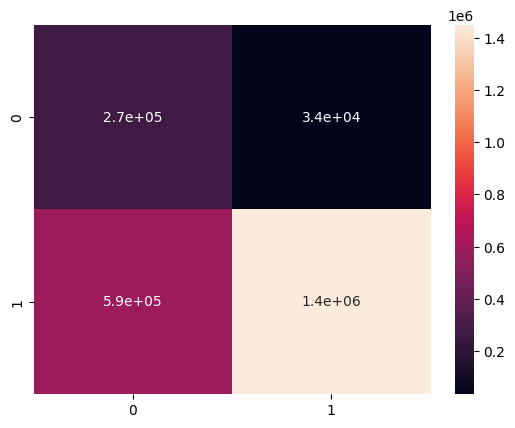

In [44]:
sns.heatmap(confusion_matrix(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"]), annot=True)

In [45]:
fpr, tpr, thresholds = roc_curve(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"])

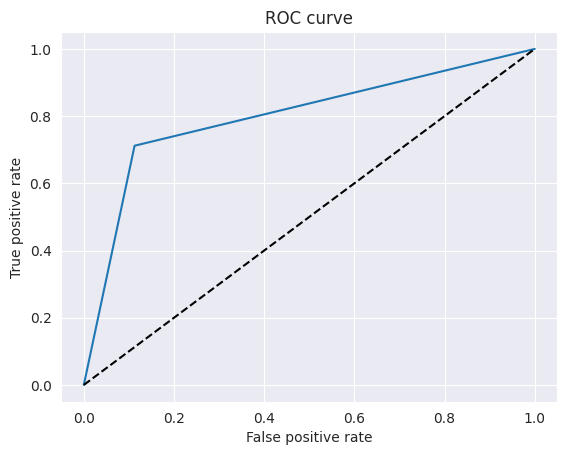

In [49]:
with sns.axes_style("darkgrid"):
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, linestyle="--", color="k")
    plt.title("ROC curve")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

In [47]:
AUROC = roc_auc_score(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"])

In [48]:
AUROC

0.7996542604285892

## **Gini and Kolmogorov-Smirnov evaluations**

In [50]:
df_predicted_probs = df_predicted_probs.sort_values("y_hat_test_proba")

In [51]:
df_predicted_probs = df_predicted_probs.reset_index()

In [63]:
df_predicted_probs["Cumulative N Population"] = df_predicted_probs.index + 1

In [64]:
df_predicted_probs["Cumulative N Good"] = df_predicted_probs["loan_targets_test"].cumsum()

In [65]:
df_predicted_probs["Cumulative N Bad"] = df_predicted_probs["Cumulative N Population"] - df_predicted_probs["Cumulative N Good"]

In [66]:
df_predicted_probs["Cumulative Perc Population"] = df_predicted_probs["Cumulative N Population"] / df_predicted_probs.shape[0]

In [67]:
df_predicted_probs["Cumulative Perc Good"] = df_predicted_probs["Cumulative N Good"] / (df_predicted_probs["loan_targets_test"].sum())

In [68]:
df_predicted_probs["Cumulative Perc Bad"] = df_predicted_probs["Cumulative N Bad"] / (df_predicted_probs.shape[0] - df_predicted_probs["loan_targets_test"].sum())

In [69]:
df_predicted_probs.tail()

,id,loan_targets_test,y_hat_test_proba,predicted,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
2340388,168663519,1,0.999999,True,2340389,2036842,303547,0.999998,0.999998,1.0
2340389,168883708,1,0.999999,True,2340390,2036843,303547,0.999999,0.999999,1.0
2340390,168578271,1,0.999999,True,2340391,2036844,303547,0.999999,0.999999,1.0
2340391,168923557,1,0.999999,True,2340392,2036845,303547,1.000000,1.000000,1.0
2340392,167977861,1,1.000000,True,2340393,2036846,303547,1.000000,1.000000,1.0


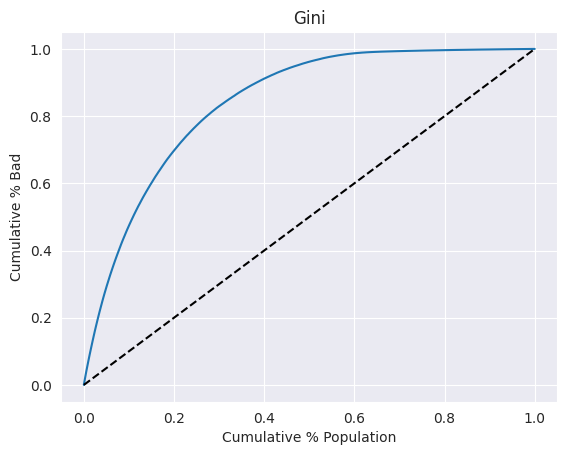

In [73]:
with sns.axes_style("darkgrid"):
    plt.plot(df_predicted_probs["Cumulative Perc Population"], df_predicted_probs["Cumulative Perc Bad"])
    plt.plot(df_predicted_probs["Cumulative Perc Population"], df_predicted_probs["Cumulative Perc Population"], linestyle="--", color="k")
    plt.title("Gini")
    plt.xlabel("Cumulative % Population")
    plt.ylabel("Cumulative % Bad")

In [75]:
Gini = (AUROC * 2) - 1
Gini

0.5993085208571785

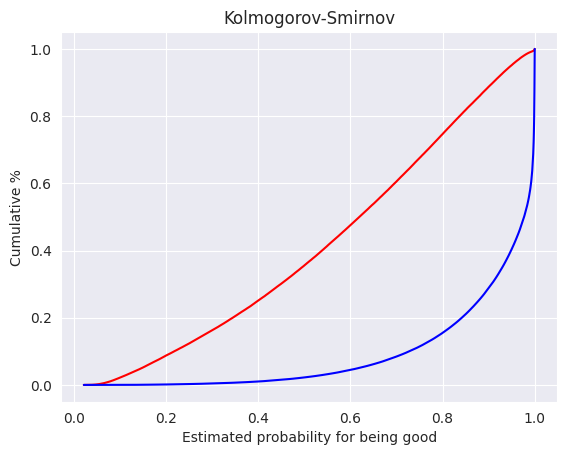

In [71]:
with sns.axes_style("darkgrid"):
    plt.plot(df_predicted_probs["y_hat_test_proba"], df_predicted_probs["Cumulative Perc Bad"], color="r")
    plt.plot(df_predicted_probs["y_hat_test_proba"], df_predicted_probs["Cumulative Perc Good"], color="b")
    plt.title("Kolmogorov-Smirnov")
    plt.xlabel("Estimated probability for being good")
    plt.ylabel("Cumulative %")


In [72]:
KS = max(df_predicted_probs["Cumulative Perc Bad"] - df_predicted_probs["Cumulative Perc Good"])
KS

0.6085240823617468